In [91]:
%pip install ../../mlrose/
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

Processing /Users/VivianNTran/Documents/CS7641 - ML/Assignment 2/mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=102999 sha256=9546daa4ade5df55663a1a87c54e73dec07005fd217f43e7b6f7edd9e3c559f7
  Stored in directory: /private/var/folders/rk/9q8_q_l50ls0c1pdxg38z9m80000gp/T/pip-ephem-wheel-cache-g6hx_xgy/wheels/6d/5b/da/7cf5d7915d22f9006694bfefef2b605b6ed6540017cd5e1e1a
Successfully built mlrose-hiive
  Attempting uninstall: mlrose-hiive
    Found existing installation: mlrose-hiive 2.2.4
    Uninstalling mlrose-hiive-2.2.4:
      Successfully uninstalled mlrose-hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [258]:
RANDOM_STATE = 101
seeds = [1, 7, 9, 101, 127]
max_iters = 600
max_attempts = 500
length = 25

In [259]:
# Define fitness function
problem = mlrose.ContinuousPeaksGenerator.generate(size = length, seed=RANDOM_STATE)

### RO Algorithm Experiments

In [260]:
# Define fitness function
problem = mlrose.ContinuousPeaksGenerator.generate(size = length, seed=RANDOM_STATE)

In [261]:
# Randomized Hill Climbing
avg_rhc_run = []
for restart in [0, 25, 50, 75, 100]:
    restart_array = []
    for seed in seeds:
        problem = mlrose.ContinuousPeaksGenerator.generate(size = length, seed=RANDOM_STATE)
        rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem = problem, restarts = restart, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        restart_array.append(rhc_fitness_curve)
    avg_rhc_run.append(restart_array)


# average the curves
rhc_avgs = []
for i in range(len(avg_rhc_run)):
    avg = []
    for j in range(len(avg_rhc_run[i])):
        run = avg_rhc_run[i][j]
        if len(run) < max_iters:
            add_on = np.tile(run[-1], ((max_iters - len(run)), 1)) 
            run = np.append(run, add_on, axis=0)
        avg.append(run[:,0])
    rhc_avgs.append(avg)

# Generating lines and confidence intervals
a = np.array(rhc_avgs[0])
rhc_restart_0 = np.mean(a, axis=0)
rhc_restart_0_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(rhc_avgs[1])
rhc_restart_25 = np.mean(a, axis=0)
rhc_restart_25_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(rhc_avgs[2])
rhc_restart_50 = np.mean(a, axis=0)
rhc_restart_50_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(rhc_avgs[3])
rhc_restart_75 = np.mean(a, axis=0)
rhc_restart_75_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(rhc_avgs[4])
rhc_restart_100 = np.mean(a, axis=0)
rhc_restart_100_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

In [262]:
# Simulated Annealing
avg_sa_run_temp = []
avg_sa_run_decay = []
for temp in [.25, .5, 1]:
    temp_array = []
    for seed in seeds:
        problem = mlrose.ContinuousPeaksGenerator.generate(size = length, seed=RANDOM_STATE)
        schedule = mlrose.GeomDecay(init_temp = temp)
        sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem = problem, schedule = schedule, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        temp_array.append(sa_fitness_curve)
    avg_sa_run_temp.append(temp_array)

# average the curves
sa_avgs = []
for i in range(len(avg_sa_run_temp)):
    avg = []
    for j in range(len(avg_sa_run_temp[i])):
        run = avg_sa_run_temp[i][j]
        if len(run) < max_iters:
            add_on = np.tile(run[-1], ((max_iters - len(run)), 1)) 
            run = np.append(run, add_on, axis=0)
        avg.append(run[:,0])
    sa_avgs.append(avg)

a = np.array(sa_avgs[0])
sa_temp_25 = np.mean(a, axis=0)
sa_temp_25_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(sa_avgs[1])
sa_temp_5 = np.mean(a, axis=0)
sa_temp_5_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(sa_avgs[2])
sa_temp_1 = np.mean(a, axis=0)
sa_temp_1_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))


for decay in [.25, .5, .99]:
    decay_array = []
    for seed in seeds:
        problem = mlrose.ContinuousPeaksGenerator.generate(size = length, seed=RANDOM_STATE)
        schedule = mlrose.GeomDecay(decay = decay)
        sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem = problem, schedule = schedule, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        decay_array.append(sa_fitness_curve)
    avg_sa_run_decay.append(decay_array)

# average the curves
sa_avgs = []
for i in range(len(avg_sa_run_decay)):
    avg = []
    for j in range(len(avg_sa_run_decay[i])):
        run = avg_sa_run_decay[i][j]
        if len(run) < max_iters:
            add_on = np.tile(run[-1], ((max_iters - len(run)), 1)) 
            run = np.append(run, add_on, axis=0)
        avg.append(run[:,0])
    sa_avgs.append(avg)

a = np.array(sa_avgs[0])
sa_decay_25 = np.mean(a, axis=0)
sa_decay_25_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(sa_avgs[1])
sa_decay_5 = np.mean(a, axis=0)
sa_decay_5_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(sa_avgs[2])
sa_decay_99 = np.mean(a, axis=0)
sa_decay_99_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

In [263]:
# Genetic Algorithm
avg_ga_run_pop = []
avg_ga_run_mutate = []
    
for pop_size in [50, 100, 500]:
    pop_array = []
    for seed in seeds:
        problem = mlrose.ContinuousPeaksGenerator.generate(size = length, seed=RANDOM_STATE)
        ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, pop_size = pop_size, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        pop_array.append(ga_fitness_curve)
    avg_ga_run_pop.append(pop_array)
        
    
for mutation in [0.1, 0.5, 0.75]:
    mutate_array = []
    for seed in seeds:
        problem = mlrose.ContinuousPeaksGenerator.generate(size = length, seed=RANDOM_STATE)
        ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, mutation_prob = mutation, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        mutate_array.append(ga_fitness_curve)
    avg_ga_run_mutate.append(mutate_array)

# average the curves
ga_avgs = []
for i in range(len(avg_ga_run_pop)):
    avg = []
    for j in range(len(avg_ga_run_pop[i])):
        run = avg_ga_run_pop[i][j]
        if len(run) < max_iters:
            add_on = np.tile(run[-1], ((max_iters - len(run)), 1)) 
            run = np.append(run, add_on, axis=0)
        avg.append(run[:,0])
    ga_avgs.append(avg)

a = np.array(ga_avgs[0])
ga_pop_50 = np.mean(a, axis=0)
ga_pop_50_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(ga_avgs[1])
ga_pop_100 = np.mean(a, axis=0)
ga_pop_100_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(ga_avgs[2])
ga_pop_500 = np.mean(a, axis=0)
ga_pop_500_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

# average the curves
ga_avgs = []
for i in range(len(avg_ga_run_mutate)):
    avg = []
    for j in range(len(avg_ga_run_mutate[i])):
        run = avg_ga_run_mutate[i][j]
        if len(run) < max_iters:
            add_on = np.tile(run[-1], ((max_iters - len(run)), 1)) 
            run = np.append(run, add_on, axis=0)
        avg.append(run[:,0])
    ga_avgs.append(avg)

a = np.array(ga_avgs[0])
ga_mutate_1 = np.mean(a, axis=0)
ga_mutate_1_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(ga_avgs[1])
ga_mutate_5 = np.mean(a, axis=0)
ga_mutate_5_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(ga_avgs[2])
ga_mutate_75 = np.mean(a, axis=0)
ga_mutate_75_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

In [264]:
# MIMIC
avg_mimic_run_pop = []
avg_mimic_run_pct = []

for pop_size in [50, 100, 500]:
    pop_array = []
    for seed in seeds:
        problem = mlrose.ContinuousPeaksGenerator.generate(size = length, seed=RANDOM_STATE)
        mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, pop_size = pop_size, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        pop_array.append(mimic_fitness_curve)
    avg_mimic_run_pop.append(pop_array)
        
    
for pct in [0.2, 0.5, 0.8]:
    pct_array = []
    for seed in seeds:
        problem = mlrose.ContinuousPeaksGenerator.generate(size = length, seed=RANDOM_STATE)
        mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, keep_pct = pct, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        pct_array.append(mimic_fitness_curve)
    avg_mimic_run_pct.append(pct_array)

# average the curves
mimic_avgs = []
for i in range(len(avg_mimic_run_pop)):
    avg = []
    for j in range(len(avg_mimic_run_pop[i])):
        run = avg_mimic_run_pop[i][j]
        if len(run) < max_iters:
            add_on = np.tile(run[-1], ((max_iters - len(run)), 1)) 
            run = np.append(run, add_on, axis=0)
        avg.append(run[:,0])
    mimic_avgs.append(avg)

a = np.array(mimic_avgs[0])
mimic_pop_50 = np.mean(a, axis=0)
mimic_pop_50_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(mimic_avgs[1])
mimic_pop_100 = np.mean(a, axis=0)
mimic_pop_100_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(mimic_avgs[2])
mimic_pop_500 = np.mean(a, axis=0)
mimic_pop_500_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

# average the curves
mimic_avgs = []
for i in range(len(avg_mimic_run_pct)):
    avg = []
    for j in range(len(avg_mimic_run_pct[i])):
        run = avg_mimic_run_pct[i][j]
        if len(run) < max_iters:
            add_on = np.tile(run[-1], ((max_iters - len(run)), 1)) 
            run = np.append(run, add_on, axis=0)
        avg.append(run[:,0])
    mimic_avgs.append(avg)

a = np.array(mimic_avgs[0])
mimic_pct_2 = np.mean(a, axis=0)
mimic_pct_2_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(mimic_avgs[1])
mimic_pct_5 = np.mean(a, axis=0)
mimic_pct_5_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(mimic_avgs[2])
mimic_pct_8 = np.mean(a, axis=0)
mimic_pct_8_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

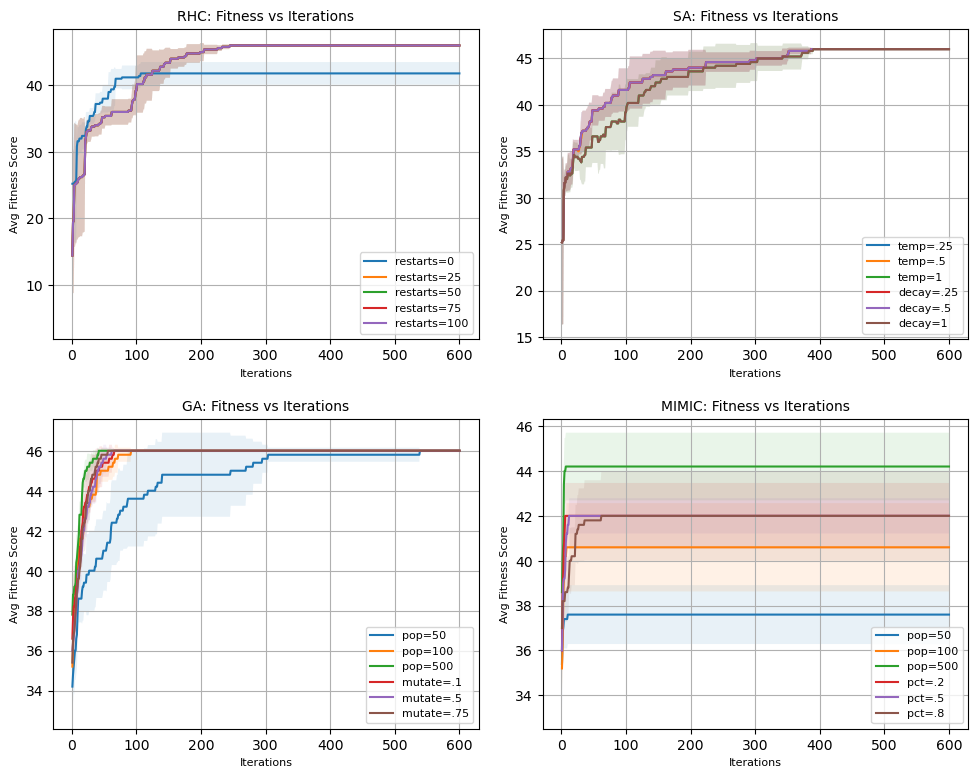

In [266]:
iterations = range(1, max_iters+1)

fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0, 0].grid()
axs[0, 0].plot(iterations, rhc_restart_0, label = 'restarts=0')
axs[0, 0].fill_between(iterations, (rhc_restart_0 - rhc_restart_0_ci), (rhc_restart_0 + rhc_restart_0_ci), alpha=0.1)
axs[0, 0].plot(iterations, rhc_restart_25, label = 'restarts=25')
axs[0, 0].fill_between(iterations, (rhc_restart_25 - rhc_restart_25_ci), (rhc_restart_25 + rhc_restart_25_ci), alpha=0.1)
axs[0, 0].plot(iterations, rhc_restart_50, label = 'restarts=50')
axs[0, 0].fill_between(iterations, (rhc_restart_50 - rhc_restart_50_ci), (rhc_restart_50 + rhc_restart_50_ci), alpha=0.1)
axs[0, 0].plot(iterations, rhc_restart_75, label = 'restarts=75')
axs[0, 0].fill_between(iterations, (rhc_restart_75 - rhc_restart_75_ci), (rhc_restart_75 + rhc_restart_75_ci), alpha=0.1)
axs[0, 0].plot(iterations, rhc_restart_100, label = 'restarts=100')
axs[0, 0].fill_between(iterations, (rhc_restart_100 - rhc_restart_100_ci), (rhc_restart_100 + rhc_restart_100_ci), alpha=0.1)
axs[0, 0].set_title('RHC: Fitness vs Iterations', fontsize=10)
axs[0, 0].set_ylabel('Avg Fitness Score', fontsize=8)
axs[0, 0].set_xlabel('Iterations', fontsize=8)
axs[0, 0].legend(loc='best', fontsize=8)
axs[0, 1].grid()
axs[0, 1].plot(iterations, sa_temp_25, label = 'temp=.25')
axs[0, 1].fill_between(iterations, (sa_temp_25 - sa_temp_25_ci), (sa_temp_25 + sa_temp_25_ci), alpha=0.1)
axs[0, 1].plot(iterations, sa_temp_5, label = 'temp=.5')
axs[0, 1].fill_between(iterations, (sa_temp_5 - sa_temp_5_ci), (sa_temp_5 + sa_temp_5_ci), alpha=0.1)
axs[0, 1].plot(iterations, sa_temp_1, label = 'temp=1')
axs[0, 1].fill_between(iterations, (sa_temp_1 - sa_temp_1_ci), (sa_temp_1 + sa_temp_1_ci), alpha=0.1)
axs[0, 1].plot(iterations, sa_decay_25, label = 'decay=.25')
axs[0, 1].fill_between(iterations, (sa_decay_25 - sa_decay_25_ci), (sa_decay_25 + sa_decay_25_ci), alpha=0.1)
axs[0, 1].plot(iterations, sa_decay_5, label = 'decay=.5')
axs[0, 1].fill_between(iterations, (sa_decay_5 - sa_decay_5_ci), (sa_decay_5 + sa_decay_5_ci), alpha=0.1)
axs[0, 1].plot(iterations, sa_decay_99, label = 'decay=1')
axs[0, 1].fill_between(iterations, (sa_decay_99 - sa_decay_99_ci), (sa_decay_99 + sa_decay_99_ci), alpha=0.1)
axs[0, 1].set_title('SA: Fitness vs Iterations', fontsize=10)
axs[0, 1].set_ylabel('Avg Fitness Score', fontsize=8)
axs[0, 1].set_xlabel('Iterations', fontsize=8)
axs[0, 1].legend(loc='best', fontsize=8)
axs[1, 0].grid()
axs[1, 0].plot(iterations, ga_pop_50, label = 'pop=50')
axs[1, 0].fill_between(iterations, (ga_pop_50 - ga_pop_50_ci), (ga_pop_50 + ga_pop_50_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_pop_100, label = 'pop=100')
axs[1, 0].fill_between(iterations, (ga_pop_100 - ga_pop_100_ci), (ga_pop_100 + ga_pop_100_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_pop_500, label = 'pop=500')
axs[1, 0].fill_between(iterations, (ga_pop_500 - ga_pop_500_ci), (ga_pop_500 + ga_pop_500_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_mutate_1, label = 'mutate=.1')
axs[1, 0].fill_between(iterations, (ga_mutate_1 - ga_mutate_1_ci), (ga_mutate_1 + ga_mutate_1_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_mutate_5, label = 'mutate=.5')
axs[1, 0].fill_between(iterations, (ga_mutate_5 - ga_mutate_5_ci), (ga_mutate_5 + ga_mutate_5_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_mutate_75, label = 'mutate=.75')
axs[1, 0].fill_between(iterations, (ga_mutate_75 - ga_mutate_75_ci), (ga_mutate_75 + ga_mutate_75_ci), alpha=0.1)
axs[1, 0].set_title('GA: Fitness vs Iterations', fontsize=10)
axs[1, 0].set_ylabel('Avg Fitness Score', fontsize=8)
axs[1, 0].set_xlabel('Iterations', fontsize=8)
axs[1, 0].legend(loc='best', fontsize=8)
axs[1, 1].grid()
axs[1, 1].plot(iterations, mimic_pop_50, label = 'pop=50')
axs[1, 1].fill_between(iterations, (mimic_pop_50 - mimic_pop_50_ci), (mimic_pop_50 + mimic_pop_50_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pop_100, label = 'pop=100')
axs[1, 1].fill_between(iterations, (mimic_pop_100 - mimic_pop_100_ci), (mimic_pop_100 + mimic_pop_100_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pop_500, label = 'pop=500')
axs[1, 1].fill_between(iterations, (mimic_pop_500 - mimic_pop_500_ci), (mimic_pop_500 + mimic_pop_500_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pct_2, label = 'pct=.2')
axs[1, 1].fill_between(iterations, (mimic_pct_2 - mimic_pct_2_ci), (mimic_pct_2 + mimic_pct_2_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pct_5, label = 'pct=.5')
axs[1, 1].fill_between(iterations, (mimic_pct_5 - mimic_pct_5_ci), (mimic_pct_5 + mimic_pct_5_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pct_8, label = 'pct=.8')
axs[1, 1].fill_between(iterations, (mimic_pct_8 - mimic_pct_8_ci), (mimic_pct_8 + mimic_pct_8_ci), alpha=0.1)
axs[1, 1].set_title('MIMIC: Fitness vs Iterations', fontsize=10)
axs[1, 1].set_ylabel('Avg Fitness Score', fontsize=8)
axs[1, 1].set_xlabel('Iterations', fontsize=8)
axs[1, 1].legend(loc='best', fontsize=8)
fig.tight_layout(pad = 1.5)
plt.savefig('plots/continuous_fitness_experiments.png', dpi=1200)

### Feature Evaluation Analysis

In [100]:
problem = mlrose.ContinuousPeaksGenerator.generate(size = length, seed=RANDOM_STATE)
iterations = range(0, 600, 100)

In [101]:
# Randomized Hill Climbing
rhc_stats = []
rhc_curves = []
for seed in seeds:
    

    rhc = mlrose.RHCRunner(problem=problem,
                    experiment_name='continuous_max_rhc',
                    output_directory='./feval_outputs',
                    seed=seed,
                    iteration_list=[*iterations],
                    max_attempts=max_attempts,
                    restart_list=[0, 25, 75, 100])   

    # the two data frames will contain the results
    rhc_df_run_stats, rhc_df_run_curves = rhc.run()
    rhc_stats.append(rhc_df_run_stats)
    rhc_curves.append(rhc_df_run_curves)

ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler


In [102]:
rhc_best_fitness = pd.DataFrame()
for i in range(len(rhc_curves)):
    best_fitness = rhc_curves[i]['Fitness'].max()
    best_runs = rhc_curves[i][rhc_curves[i]['Fitness'] == best_fitness]
    rhc_best_fitness = pd.concat([rhc_best_fitness, best_runs])

In [103]:
rhc_best_fitness

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
954,53,0.019669,46.0,914.0,25,500,8
955,54,0.019717,46.0,915.0,25,500,8
956,55,0.019767,46.0,916.0,25,500,8
957,56,0.019816,46.0,917.0,25,500,8
958,57,0.019877,46.0,918.0,25,500,8
...,...,...,...,...,...,...,...
18599,96,0.004087,46.0,8804.0,100,500,82
18600,97,0.004118,46.0,8805.0,100,500,82
18601,98,0.004150,46.0,8806.0,100,500,82
18602,99,0.004181,46.0,8807.0,100,500,82


In [104]:
rhc_min_evals = rhc_best_fitness['FEvals'].min()
rhc_best_curve_run = rhc_best_fitness[rhc_best_fitness['FEvals'] == rhc_min_evals]

In [105]:
rhc_best_curve_run

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
476,75,0.004586,46.0,395.0,25,500,3
3077,75,0.004586,46.0,395.0,75,500,3
10678,75,0.004586,46.0,395.0,100,500,3


In [141]:
# Simulated Annealing
sa_stats = []
sa_curves = []
for seed in seeds:
    sa = mlrose.SARunner(problem=problem,
                  experiment_name='continuous_max_sa',
                  output_directory='./feval_outputs',
                  seed=seed,
                  iteration_list=[*iterations],
                  max_attempts=max_attempts,
                  temperature_list=[mlrose.GeomDecay(init_temp=t, decay=d) for (t, d) in [(.001, 0.55), (.01, 0.55), (.1, .55), (.25, .55), (.5, .55), (.75, .55), (1, .55)]])

    # the two data frames will contain the results
    sa_df_run_stats, sa_df_run_curves = sa.run()
    sa_stats.append(sa_df_run_stats)
    sa_curves.append(sa_df_run_curves)

ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler


In [142]:
sa_best_fitness = pd.DataFrame()
for i in range(len(sa_curves)):
    best_fitness = sa_curves[i]['Fitness'].max()
    best_runs = sa_curves[i][sa_curves[i]['Fitness'] == best_fitness]
    sa_best_fitness = pd.concat([sa_best_fitness, best_runs])

In [143]:
sa_best_fitness

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
68,68,0.007800,41.0,101.0,0.001,500
69,69,0.007833,41.0,102.0,0.001,500
70,70,0.007866,41.0,103.0,0.001,500
71,71,0.007905,41.0,105.0,0.001,500
72,72,0.007945,41.0,107.0,0.001,500
...,...,...,...,...,...,...
702,96,0.004173,42.0,122.0,1,500
703,97,0.004203,42.0,123.0,1,500
704,98,0.004234,42.0,124.0,1,500
705,99,0.004265,42.0,125.0,1,500


In [144]:
sa_min_evals = sa_best_fitness['FEvals'].min()
sa_best_curve_run = sa_best_fitness[sa_best_fitness['FEvals'] == sa_min_evals]

In [145]:
sa_best_curve_run

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
58,58,0.003094,37.0,91.0,0.001,500
159,58,0.003094,37.0,91.0,0.01,500
260,58,0.003094,37.0,91.0,0.1,500
361,58,0.003094,37.0,91.0,0.25,500
462,58,0.003094,37.0,91.0,0.5,500
563,58,0.003094,37.0,91.0,0.75,500
664,58,0.003094,37.0,91.0,1,500


In [111]:
# Genetic Algorithm
ga_stats = []
ga_curves = []
for seed in seeds:
    ga = mlrose.GARunner(problem=problem,
                  experiment_name='continuous_max_ga',
                  output_directory='./feval_outputs', # note: specify an output directory to have results saved to disk
                  seed=seed,
                  iteration_list=[*iterations],
                  max_attempts = max_attempts,
                  population_sizes=[10, 20, 50, 100, 150, 200, 250, 500],
                  mutation_rates=[0.1, 0.2, 0.5, 0.75, 1])

    # the two data frames will contain the results
    ga_df_run_stats, ga_df_run_curves = ga.run()
    ga_stats.append(ga_df_run_stats)
    ga_curves.append(ga_df_run_curves)

ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler


In [112]:
ga_best_fitness = pd.DataFrame()
for i in range(len(ga_curves)):
    best_fitness = ga_curves[i]['Fitness'].max()
    best_runs = ga_curves[i][ga_curves[i]['Fitness'] == best_fitness]
    ga_best_fitness = pd.concat([ga_best_fitness, best_runs])

In [113]:
ga_best_fitness

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
549,44,0.020243,46.0,952.0,20,0.1,500
550,45,0.020595,46.0,973.0,20,0.1,500
551,46,0.020954,46.0,994.0,20,0.1,500
552,47,0.021304,46.0,1015.0,20,0.1,500
553,48,0.021647,46.0,1036.0,20,0.1,500
...,...,...,...,...,...,...,...
4035,96,0.036992,46.0,48604.0,500,1.0,500
4036,97,0.037355,46.0,49105.0,500,1.0,500
4037,98,0.037723,46.0,49606.0,500,1.0,500
4038,99,0.038092,46.0,50107.0,500,1.0,500


In [114]:
ga_min_evals = ga_best_fitness['FEvals'].min()
ga_best_curve_run = ga_best_fitness[ga_best_fitness['FEvals'] == ga_min_evals]

In [115]:
ga_best_curve_run

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
355,52,0.014939,46.0,592.0,10,0.75,500


In [116]:
# MIMIC
mimic_stats = []
mimic_curves = []
for seed in seeds:
    mmc = mlrose.MIMICRunner(problem=problem,
                      experiment_name='continuous_max_mimic',
                      output_directory='./feval_outputs',
                      seed=seed,
                      iteration_list=[*iterations],
                      max_attempts=max_attempts,
                      population_sizes = [10, 20, 50, 100, 150, 200, 250, 500],
                      keep_percent_list=[0.1, 0.25, 0.5, 0.75, 0.9],
                      use_fast_mimic = True)
                      
    # the two data frames will contain the results
    mimic_df_run_stats, mimic_df_run_curves = mmc.run()
    mimic_stats.append(mimic_df_run_stats)
    mimic_curves.append(mimic_df_run_curves)

ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler


In [117]:
mimic_best_fitness = pd.DataFrame()
for i in range(len(mimic_curves)):
    best_fitness = mimic_curves[i]['Fitness'].max()
    best_runs = mimic_curves[i][mimic_curves[i]['Fitness'] == best_fitness]
    mimic_best_fitness = pd.concat([mimic_best_fitness, best_runs])

In [118]:
mimic_best_fitness

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
3034,4,0.019361,45.0,1257.0,True,250,0.1,500
3035,5,0.022613,45.0,1508.0,True,250,0.1,500
3036,6,0.025785,45.0,1759.0,True,250,0.1,500
3037,7,0.028746,45.0,2010.0,True,250,0.1,500
3038,8,0.031933,45.0,2261.0,True,250,0.1,500
...,...,...,...,...,...,...,...,...
3631,96,0.261618,46.0,48600.0,True,500,0.1,500
3632,97,0.264456,46.0,49101.0,True,500,0.1,500
3633,98,0.267682,46.0,49602.0,True,500,0.1,500
3634,99,0.270692,46.0,50103.0,True,500,0.1,500


In [119]:
mimic_min_evals = mimic_best_fitness['FEvals'].min()
mimic_best_curve_run = mimic_best_fitness[mimic_best_fitness['FEvals'] == mimic_min_evals]

In [120]:
mimic_best_curve_run

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
2025,5,0.018218,45.0,910.0,True,150,0.1,500


### Best Fitness vs Problem Size

In [361]:
RHC=[]
GA=[]
SA=[]
MIMIC=[]

In [362]:
for size in [10, 25, 50]:
    rhc_array = []
    sa_array = []
    ga_array = []
    mimic_array = []
    for seed in seeds:
        # Define optimization problem object
        problem = mlrose.ContinuousPeaksGenerator.generate(size = size, seed=RANDOM_STATE)
    
        # Randomized Hill Climbing
        start_time = time.time()
        rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem = problem, restarts = 100, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        end_time = time.time()
        rhc_time = end_time - start_time
        rhc_array.append([size, rhc_time, rhc_fitness_curve[:,0][-1]])
    
        # Simulated Annealing
        start_time = time.time()
        schedule = mlrose.GeomDecay(init_temp=.001, decay=.55)
        sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem = problem, schedule = schedule, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        end_time = time.time()
        sa_time = end_time - start_time
        sa_array.append([size, sa_time, sa_fitness_curve[:,0][-1]])
    
        # Genetic Algorithm
        start_time = time.time()
        ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, pop_size = 10, mutation_prob = .75, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        end_time = time.time()
        ga_time = end_time - start_time
        ga_array.append([size, ga_time, ga_fitness_curve[:,0][-1]])
    
        # MIMIC
        start_time = time.time()
        mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, pop_size = 150, keep_pct = .1, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        end_time = time.time()
        mimic_time = end_time - start_time
        mimic_array.append([size, mimic_time, mimic_fitness_curve[:,0][-1]])
    RHC.append(rhc_array)
    SA.append(sa_array)
    GA.append(ga_array)
    MIMIC.append(mimic_array)

In [363]:
print(RHC)

[[[10, 0.6008198261260986, 18.0], [10, 0.6194179058074951, 18.0], [10, 0.7643017768859863, 18.0], [10, 0.4228191375732422, 18.0], [10, 0.5616650581359863, 18.0]], [[25, 0.7837209701538086, 46.0], [25, 0.7123749256134033, 46.0], [25, 0.6269829273223877, 46.0], [25, 0.9413728713989258, 46.0], [25, 1.1848821640014648, 46.0]], [[50, 1.0902767181396484, 94.0], [50, 1.4535129070281982, 94.0], [50, 1.2860510349273682, 94.0], [50, 1.5869510173797607, 94.0], [50, 1.2889361381530762, 94.0]]]


In [364]:
# Average fitness scores
rhc_fitness_scores = []
rhc_cis = []
for i in range(len(RHC)):
    # print(RHC[i])
    rhc_fitness_scores.append(np.mean(np.array(RHC[i]), axis=0))
    rhc_ci = (1.96 * np.std(np.array(RHC[i]), axis = 0) / np.sqrt(len(RHC[i])))
    rhc_cis.append(rhc_ci)
# print(rhc_fitness_scores)
# print(rhc_cis)

sa_fitness_scores = []
sa_cis = []
for i in range(len(SA)):
    sa_fitness_scores.append(np.mean(np.array(SA[i]), axis=0))
    sa_ci = (1.96 * np.std(np.array(SA[i]), axis = 0) / np.sqrt(len(SA[i])))
    sa_cis.append(sa_ci)

ga_fitness_scores = []
ga_cis = []
for i in range(len(GA)):
    ga_fitness_scores.append(np.mean(np.array(GA[i]), axis=0))
    ga_ci = (1.96 * np.std(np.array(GA[i]), axis = 0) / np.sqrt(len(GA[i])))
    ga_cis.append(ga_ci)

mimic_fitness_scores = []
mimic_cis = []
for i in range(len(MIMIC)):
    mimic_fitness_scores.append(np.mean(np.array(MIMIC[i]), axis=0))
    mimic_ci = (1.96 * np.std(np.array(MIMIC[i]), axis = 0) / np.sqrt(len(MIMIC[i])))
    mimic_cis.append(mimic_ci)

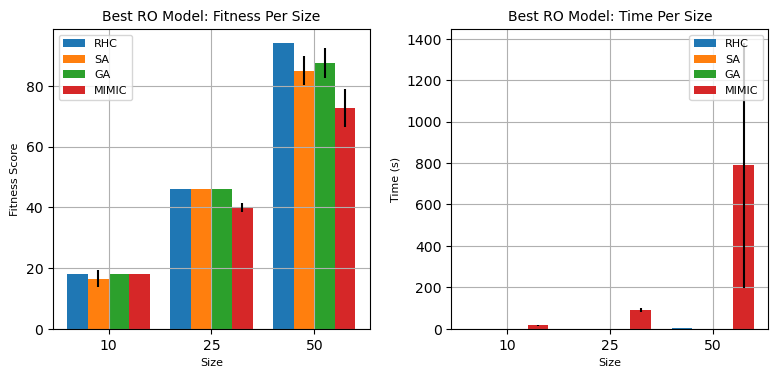

In [365]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))

size = [10, 25, 50]
rhcs= [rhc_fitness_scores[i][2] for i in range(len(rhc_fitness_scores))]
sas= [sa_fitness_scores[i][2] for i in range(len(sa_fitness_scores))]
gas= [ga_fitness_scores[i][2] for i in range(len(ga_fitness_scores))]
mimics= [mimic_fitness_scores[i][2] for i in range(len(mimic_fitness_scores))]
rhc_err=[rhc_cis[i][2] for i in range(len(rhc_cis))]
sa_err=[sa_cis[i][2] for i in range(len(sa_cis))]
ga_err=[ga_cis[i][2] for i in range(len(ga_cis))]
mimic_err=[mimic_cis[i][2] for i in range(len(mimic_cis))]
x = np.arange(len(size))
width=.2
axs[0].bar(x-.3, rhcs, width, yerr=rhc_err)
axs[0].bar(x-.1, sas, width, yerr=sa_err)
axs[0].bar(x+.1, gas, width, yerr=ga_err)
axs[0].bar(x+.3, mimics, width, yerr=mimic_err)
axs[0].set_xticks(x, size)
axs[0].set_title('Best RO Model: Fitness Per Size', fontsize=10)
axs[0].set_xlabel('Size', fontsize=8)
axs[0].set_ylabel('Fitness Score', fontsize=8)
axs[0].legend(['RHC', 'SA', 'GA', 'MIMIC'],loc='best', fontsize=8)
axs[0].grid()


rhcs= [rhc_fitness_scores[i][1] for i in range(len(rhc_fitness_scores))]
sas= [sa_fitness_scores[i][1] for i in range(len(sa_fitness_scores))]
gas= [ga_fitness_scores[i][1] for i in range(len(ga_fitness_scores))]
mimics= [mimic_fitness_scores[i][1] for i in range(len(mimic_fitness_scores))]
rhc_err=[rhc_cis[i][1] for i in range(len(rhc_cis))]
sa_err=[sa_cis[i][1] for i in range(len(sa_cis))]
ga_err=[ga_cis[i][1] for i in range(len(ga_cis))]
mimic_err=[mimic_cis[i][1] for i in range(len(mimic_cis))]
x = np.arange(len(size))
width=.2
axs[1].bar(x-.3, rhcs, width, yerr=rhc_err)
axs[1].bar(x-.1, sas, width, yerr=sa_err)
axs[1].bar(x+.1, gas, width, yerr=ga_err)
axs[1].bar(x+.3, mimics, width, yerr=mimic_err)
axs[1].set_xticks(x, size)
axs[1].set_title('Best RO Model: Time Per Size', fontsize=10)
axs[1].set_xlabel('Size', fontsize=8)
axs[1].set_ylabel('Time (s)', fontsize=8)
axs[1].legend(['RHC', 'SA', 'GA', 'MIMIC'],loc='best', fontsize=8)
axs[1].grid()


fig.tight_layout(pad = 1.5)
plt.savefig('plots/continuous_best_fitness_problem_size.png', dpi=1200)
plt.show()

### Best Fitness vs Iteration

In [354]:
# Define fitness function
problem = mlrose.ContinuousPeaksGenerator.generate(size = length, seed=RANDOM_STATE)

In [355]:
rhc_array = []
sa_array = []
ga_array = []
mimic_array = []
for seed in seeds:
    # Define optimization problem object
    problem = mlrose.ContinuousPeaksGenerator.generate(size = length, seed=RANDOM_STATE)
    
    # Randomized Hill Climbing
    start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem = problem, restarts = 100, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    rhc_time = end_time - start_time
    rhc_array.append([rhc_time, rhc_fitness_curve])

    # Simulated Annealing
    start_time = time.time()
    schedule = mlrose.GeomDecay(init_temp=.001, decay=.55)
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem = problem, schedule = schedule, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    sa_time = end_time - start_time
    sa_array.append([sa_time, sa_fitness_curve])

    # Genetic Algorithm
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, pop_size = 10, mutation_prob = .75, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    ga_time = end_time - start_time
    ga_array.append([ga_time, ga_fitness_curve])

    # MIMIC
    start_time = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, pop_size = 150, keep_pct = .1, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    mimic_time = end_time - start_time
    mimic_array.append([mimic_time, mimic_fitness_curve])

In [275]:
rhc_fitness_scores = []
rhc_fitness_time = []
for j in range(len(rhc_array)):
    rhc_array_j1 = rhc_array[j][1]
    if len(rhc_array_j1) < max_iters:
        add_on = np.tile(rhc_array_j1[-1], ((max_iters - len(rhc_array_j1)), 1)) 
        rhc_array_j1 = np.append(rhc_array_j1, add_on, axis=0)
    rhc_fitness_scores.append(rhc_array_j1)
    rhc_fitness_time.append(rhc_array[j][0])
rhc_fitness_time_ci = 1.96 * np.std(np.array(rhc_fitness_time)) / np.sqrt(len(rhc_fitness_time))
rhc_fitness_time = sum(rhc_fitness_time) / len(seeds)
rhc_fitness_ci = (1.96 * np.std(np.array(rhc_fitness_scores), axis = 0) / np.sqrt(len(rhc_fitness_scores)))[:,0]
rhc_feval_ci = (1.96 * np.std(np.array(rhc_fitness_scores), axis = 0) / np.sqrt(len(rhc_fitness_scores)))[:,1]
rhc_fitness_scores = np.mean(np.array(rhc_fitness_scores), axis = 0)
rhc_feval_scores = rhc_fitness_scores[:,1]
rhc_fitness_scores = rhc_fitness_scores[:,0]


sa_fitness_scores = []
sa_fitness_time = []
for j in range(len(sa_array)):
    sa_array_j1 = sa_array[j][1]
    if len(sa_array_j1) < max_iters:
        add_on = np.tile(sa_array_j1[-1], ((max_iters - len(sa_array_j1)), 1)) 
        sa_array_j1 = np.append(sa_array_j1, add_on, axis=0)
    sa_fitness_scores.append(sa_array_j1)
    sa_fitness_time.append(sa_array[j][0])
sa_fitness_time_ci = 1.96 * np.std(np.array(sa_fitness_time)) / np.sqrt(len(sa_fitness_time))
sa_fitness_time = sum(sa_fitness_time) / len(seeds)
sa_fitness_ci = (1.96 * np.std(np.array(sa_fitness_scores), axis = 0) / np.sqrt(len(sa_fitness_scores)))[:,0]
sa_feval_ci = (1.96 * np.std(np.array(sa_fitness_scores), axis = 0) / np.sqrt(len(sa_fitness_scores)))[:,1]
sa_fitness_scores = np.mean(np.array(sa_fitness_scores), axis = 0)
sa_feval_scores = sa_fitness_scores[:,1]
sa_fitness_scores = sa_fitness_scores[:,0]


ga_fitness_scores = []
ga_fitness_time = []
for j in range(len(ga_array)):
    ga_array_j1 = ga_array[j][1]
    if len(ga_array_j1) < max_iters:
        add_on = np.tile(ga_array_j1[-1], ((max_iters - len(ga_array_j1)), 1)) 
        ga_array_j1 = np.append(ga_array_j1, add_on, axis=0)
    ga_fitness_scores.append(ga_array_j1)
    ga_fitness_time.append(ga_array[j][0])
ga_fitness_time_ci = 1.96 * np.std(np.array(ga_fitness_time)) / np.sqrt(len(ga_fitness_time))
ga_fitness_time = sum(ga_fitness_time) / len(seeds)
ga_fitness_ci = (1.96 * np.std(np.array(ga_fitness_scores), axis = 0) / np.sqrt(len(ga_fitness_scores)))[:,0]
ga_feval_ci = (1.96 * np.std(np.array(ga_fitness_scores), axis = 0) / np.sqrt(len(ga_fitness_scores)))[:,1]
ga_fitness_scores = np.mean(np.array(ga_fitness_scores), axis = 0)
ga_feval_scores = ga_fitness_scores[:,1]
ga_fitness_scores = ga_fitness_scores[:,0]


mimic_fitness_scores = []
mimic_fitness_time = []
for j in range(len(mimic_array)):
    mimic_array_j1 = mimic_array[j][1]
    # print('Before: ', mimic_array_j1)
    if len(mimic_array_j1) < max_iters:
        add_on = np.tile(mimic_array_j1[-1], ((max_iters - len(mimic_array_j1)), 1)) 
        mimic_array_j1 = np.append(mimic_array_j1, add_on, axis=0)
    # print('After: ', mimic_array_j1)
    mimic_fitness_scores.append(mimic_array_j1)
    mimic_fitness_time.append(mimic_array[j][0])
mimic_fitness_time_ci = 1.96 * np.std(np.array(mimic_fitness_time)) / np.sqrt(len(mimic_fitness_time))
mimic_fitness_time = sum(mimic_fitness_time) / len(seeds)
mimic_fitness_ci = (1.96 * np.std(np.array(mimic_fitness_scores), axis = 0) / np.sqrt(len(mimic_fitness_scores)))[:,0]
mimic_feval_ci = (1.96 * np.std(np.array(mimic_fitness_scores), axis = 0) / np.sqrt(len(mimic_fitness_scores)))[:,1]
mimic_fitness_scores = np.mean(np.array(mimic_fitness_scores), axis = 0)
mimic_feval_scores = mimic_fitness_scores[:,1]
mimic_fitness_scores = mimic_fitness_scores[:,0]

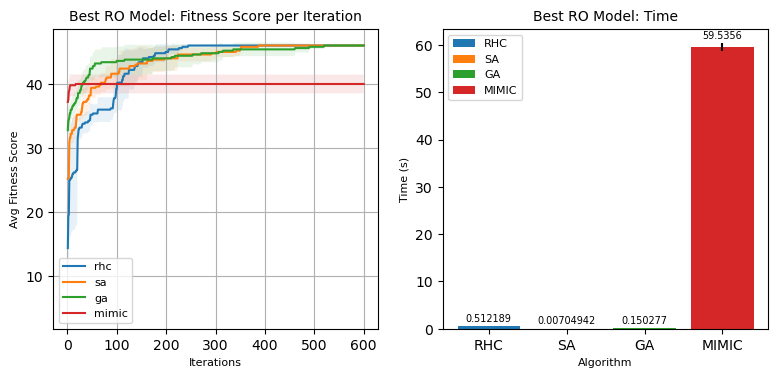

In [281]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
iterations = range(1, max_iters+1)
axs[0].plot(iterations, rhc_fitness_scores, label='rhc')
axs[0].fill_between(iterations, rhc_fitness_scores - rhc_fitness_ci, rhc_fitness_scores + rhc_fitness_ci, alpha=0.1)
axs[0].plot(iterations, sa_fitness_scores, label='sa')
axs[0].fill_between(iterations, sa_fitness_scores - sa_fitness_ci, sa_fitness_scores + sa_fitness_ci, alpha=0.1)
axs[0].plot(iterations, ga_fitness_scores, label='ga')
axs[0].fill_between(iterations, ga_fitness_scores - ga_fitness_ci, ga_fitness_scores + ga_fitness_ci, alpha=0.1)
axs[0].plot(iterations, mimic_fitness_scores, label='mimic')
axs[0].fill_between(iterations, mimic_fitness_scores - mimic_fitness_ci, mimic_fitness_scores + mimic_fitness_ci, alpha=0.1)
axs[0].set_title('Best RO Model: Fitness Score per Iteration', fontsize=10)
axs[0].set_xlabel('Iterations', fontsize=8)
axs[0].set_ylabel('Avg Fitness Score', fontsize=8)
axs[0].legend(loc='best', fontsize=8)
axs[0].grid()

algos = ['RHC', 'SA', 'GA', 'MIMIC']
times = [rhc_fitness_time, sa_fitness_time, ga_fitness_time, mimic_fitness_time]
error = [rhc_fitness_time_ci, sa_fitness_time_ci, ga_fitness_time_ci, mimic_fitness_time_ci]
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
# axs[1].errorbar(algos, times, yerr=error, fmt="o", color="0")
# axs[1].bar(algos, times, label=algos, color=bar_colors)
axs[1].bar_label(axs[1].bar(algos, times, label=algos, color=bar_colors, yerr=error), label_type='edge', fontsize=7, padding=2)
axs[1].set_title('Best RO Model: Time', fontsize=10)
axs[1].set_xlabel('Algorithm', fontsize=8)
axs[1].set_ylabel('Time (s)', fontsize=8)
axs[1].legend(loc='best', fontsize=8)

fig.tight_layout(pad = 1.5)
plt.savefig('plots/continuous_best_fitness_iteration.png', dpi=1200)
plt.show()

In [277]:
print('RHC Fitness: ', rhc_fitness_scores[-1])
print('SA Fitness: ', sa_fitness_scores[-1])
print('GA Fitness: ', ga_fitness_scores[-1])
print('MIMIC Fitness: ', mimic_fitness_scores[-1])

RHC Fitness:  46.0
SA Fitness:  46.0
GA Fitness:  46.0
MIMIC Fitness:  40.0


In [278]:
print('RHC Time: ', rhc_fitness_time)
print('SA Time: ', sa_fitness_time)
print('GA Time: ', ga_fitness_time)
print('MIMIC Time: ', mimic_fitness_time)

RHC Time:  0.5121888637542724
SA Time:  0.007049417495727539
GA Time:  0.15027742385864257
MIMIC Time:  59.53559432029724


### Feature Evaluations vs Iterations

In [279]:
print('RHC Fevals: ', rhc_feval_scores[-1])
print('SA Fevals: ', sa_feval_scores[-1])
print('GA Fevals: ', ga_feval_scores[-1])
print('MIMIC Fevals: ', mimic_feval_scores[-1])

RHC Fevals:  3325.0
SA Fevals:  659.6
GA Fevals:  6447.0
MIMIC Fevals:  76589.0


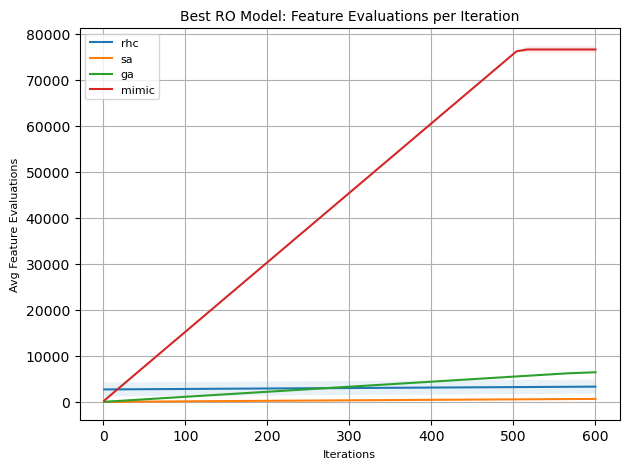

In [280]:
iterations = range(1, max_iters+1)
plt.plot(iterations, rhc_feval_scores, label='rhc')
plt.fill_between(iterations, rhc_feval_scores - rhc_feval_ci, rhc_feval_scores + rhc_feval_ci, alpha=0.1)
plt.plot(iterations, sa_feval_scores, label='sa')
plt.fill_between(iterations, sa_feval_scores - sa_feval_ci, sa_feval_scores + sa_feval_ci, alpha=0.1)
plt.plot(iterations, ga_feval_scores, label='ga')
plt.fill_between(iterations, ga_feval_scores - ga_feval_ci, ga_feval_scores + ga_feval_ci, alpha=0.1)
plt.plot(iterations, mimic_feval_scores, label='mimic')
plt.fill_between(iterations, mimic_feval_scores - mimic_feval_ci, mimic_feval_scores + mimic_feval_ci, alpha=0.1)
plt.title('Best RO Model: Feature Evaluations per Iteration', fontsize=10)
plt.xlabel('Iterations', fontsize=8)
plt.ylabel('Avg Feature Evaluations', fontsize=8)
plt.legend(loc='best', fontsize=8)
plt.tight_layout()
plt.grid()

plt.savefig('plots/continuous_best_feval_iteration.png', dpi=1200)
plt.show()

## Size: 10, 50

### Feature Evaluation Analysis

In [310]:
problem = mlrose.ContinuousPeaksGenerator.generate(size = 10, seed=RANDOM_STATE)
iterations = range(0, 700, 100)

In [311]:
# Randomized Hill Climbing
rhc_stats = []
rhc_curves = []
for seed in seeds:
    

    rhc = mlrose.RHCRunner(problem=problem,
                    experiment_name='continuous_max_rhc',
                    output_directory='./feval_outputs',
                    seed=seed,
                    iteration_list=[*iterations],
                    max_attempts=max_attempts,
                    restart_list=[0, 25, 75, 100])   

    # the two data frames will contain the results
    rhc_df_run_stats, rhc_df_run_curves = rhc.run()
    rhc_stats.append(rhc_df_run_stats)
    rhc_curves.append(rhc_df_run_curves)

ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler


In [312]:
rhc_best_fitness = pd.DataFrame()
for i in range(len(rhc_curves)):
    best_fitness = rhc_curves[i]['Fitness'].max()
    best_runs = rhc_curves[i][rhc_curves[i]['Fitness'] == best_fitness]
    rhc_best_fitness = pd.concat([rhc_best_fitness, best_runs])

In [313]:
rhc_best_fitness

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
527,26,0.013256,18.0,435.0,25,600,4
528,27,0.013271,18.0,436.0,25,600,4
529,28,0.013287,18.0,437.0,25,600,4
530,29,0.013302,18.0,438.0,25,600,4
531,30,0.013318,18.0,439.0,25,600,4
...,...,...,...,...,...,...,...
20299,96,0.003608,18.0,10259.0,100,600,99
20300,97,0.003636,18.0,10260.0,100,600,99
20301,98,0.003665,18.0,10261.0,100,600,99
20302,99,0.003693,18.0,10262.0,100,600,99


In [314]:
rhc_min_evals = rhc_best_fitness['FEvals'].min()
rhc_best_curve_run = rhc_best_fitness[rhc_best_fitness['FEvals'] == rhc_min_evals]

In [315]:
rhc_best_curve_run

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
17,17,0.002073,18.0,19.0,0,600,0
118,17,0.002073,18.0,19.0,25,600,0
2719,17,0.002073,18.0,19.0,75,600,0
10320,17,0.002073,18.0,19.0,100,600,0


In [316]:
# Simulated Annealing
sa_stats = []
sa_curves = []
for seed in seeds:
    sa = mlrose.SARunner(problem=problem,
                  experiment_name='continuous_max_sa',
                  output_directory='./feval_outputs',
                  seed=seed,
                  iteration_list=[*iterations],
                  max_attempts=max_attempts,
                  temperature_list=[mlrose.GeomDecay(init_temp=t, decay=d) for (t, d) in [(.001, 0.55), (.01, 0.55), (.1, .55), (.25, .55), (.5, .55), (.75, .55), (1, .55)]])

    # the two data frames will contain the results
    sa_df_run_stats, sa_df_run_curves = sa.run()
    sa_stats.append(sa_df_run_stats)
    sa_curves.append(sa_df_run_curves)

ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler


In [317]:
sa_best_fitness = pd.DataFrame()
for i in range(len(sa_curves)):
    best_fitness = sa_curves[i]['Fitness'].max()
    best_runs = sa_curves[i][sa_curves[i]['Fitness'] == best_fitness]
    sa_best_fitness = pd.concat([sa_best_fitness, best_runs])

In [318]:
sa_best_fitness

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
25,25,0.003701,18.0,32.0,0.001,600
26,26,0.003717,18.0,33.0,0.001,600
27,27,0.003733,18.0,34.0,0.001,600
28,28,0.003762,18.0,35.0,0.001,600
29,29,0.003804,18.0,36.0,0.001,600
...,...,...,...,...,...,...
702,96,0.003583,18.0,121.0,1,600
703,97,0.003611,18.0,122.0,1,600
704,98,0.003641,18.0,123.0,1,600
705,99,0.003670,18.0,124.0,1,600


In [319]:
sa_min_evals = sa_best_fitness['FEvals'].min()
sa_best_curve_run = sa_best_fitness[sa_best_fitness['FEvals'] == sa_min_evals]

In [320]:
sa_best_curve_run

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
17,17,0.001902,10.0,20.0,0.001,600
118,17,0.001902,10.0,20.0,0.01,600
219,17,0.001902,10.0,20.0,0.1,600
320,17,0.001902,10.0,20.0,0.25,600
421,17,0.001902,10.0,20.0,0.5,600
522,17,0.001902,10.0,20.0,0.75,600
623,17,0.001902,10.0,20.0,1,600


In [321]:
# Genetic Algorithm
ga_stats = []
ga_curves = []
for seed in seeds:
    ga = mlrose.GARunner(problem=problem,
                  experiment_name='continuous_max_ga',
                  output_directory='./feval_outputs', # note: specify an output directory to have results saved to disk
                  seed=seed,
                  iteration_list=[*iterations],
                  max_attempts = max_attempts,
                  population_sizes=[10, 20, 50, 100, 150, 200, 250, 500],
                  mutation_rates=[0.1, 0.2, 0.5, 0.75, 1])

    # the two data frames will contain the results
    ga_df_run_stats, ga_df_run_curves = ga.run()
    ga_stats.append(ga_df_run_stats)
    ga_curves.append(ga_df_run_curves)

ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler


In [322]:
ga_best_fitness = pd.DataFrame()
for i in range(len(ga_curves)):
    best_fitness = ga_curves[i]['Fitness'].max()
    best_runs = ga_curves[i][ga_curves[i]['Fitness'] == best_fitness]
    ga_best_fitness = pd.concat([ga_best_fitness, best_runs])

In [323]:
ga_best_fitness

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
2,2,0.004532,18.0,33.0,10,0.1,600
3,3,0.004878,18.0,44.0,10,0.1,600
4,4,0.005159,18.0,55.0,10,0.1,600
5,5,0.005415,18.0,66.0,10,0.1,600
6,6,0.005656,18.0,77.0,10,0.1,600
...,...,...,...,...,...,...,...
4035,96,0.024916,18.0,48597.0,500,1.0,600
4036,97,0.025156,18.0,49098.0,500,1.0,600
4037,98,0.025395,18.0,49599.0,500,1.0,600
4038,99,0.025634,18.0,50100.0,500,1.0,600


In [324]:
ga_min_evals = ga_best_fitness['FEvals'].min()
ga_best_curve_run = ga_best_fitness[ga_best_fitness['FEvals'] == ga_min_evals]

In [325]:
ga_best_curve_run

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
2,2,0.004532,18.0,33.0,10,0.1,600


In [326]:
# MIMIC
mimic_stats = []
mimic_curves = []
for seed in seeds:
    mmc = mlrose.MIMICRunner(problem=problem,
                      experiment_name='continuous_max_mimic',
                      output_directory='./feval_outputs',
                      seed=seed,
                      iteration_list=[*iterations],
                      max_attempts=max_attempts,
                      population_sizes = [10, 20, 50, 100, 150, 200, 250, 500],
                      keep_percent_list=[0.1, 0.25, 0.5, 0.75, 0.9],
                      use_fast_mimic = True)
                      
    # the two data frames will contain the results
    mimic_df_run_stats, mimic_df_run_curves = mmc.run()
    mimic_stats.append(mimic_df_run_stats)
    mimic_curves.append(mimic_df_run_curves)

ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler


In [327]:
mimic_best_fitness = pd.DataFrame()
for i in range(len(mimic_curves)):
    best_fitness = mimic_curves[i]['Fitness'].max()
    best_runs = mimic_curves[i][mimic_curves[i]['Fitness'] == best_fitness]
    mimic_best_fitness = pd.concat([mimic_best_fitness, best_runs])

In [328]:
mimic_best_fitness

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
1214,2,0.006339,18.0,154.0,True,50,0.5,600
1215,3,0.007692,18.0,205.0,True,50,0.5,600
1216,4,0.009064,18.0,256.0,True,50,0.5,600
1217,5,0.010243,18.0,307.0,True,50,0.5,600
1218,6,0.011389,18.0,358.0,True,50,0.5,600
...,...,...,...,...,...,...,...,...
4035,96,0.109405,18.0,48598.0,True,500,0.9,600
4036,97,0.110490,18.0,49099.0,True,500,0.9,600
4037,98,0.111612,18.0,49600.0,True,500,0.9,600
4038,99,0.112696,18.0,50101.0,True,500,0.9,600


In [329]:
mimic_min_evals = mimic_best_fitness['FEvals'].min()
mimic_best_curve_run = mimic_best_fitness[mimic_best_fitness['FEvals'] == mimic_min_evals]

In [330]:
mimic_best_curve_run

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
304,1,0.003441,18.0,22.0,True,10,0.75,600
405,1,0.003300,18.0,22.0,True,10,0.90,600


### Best Fitness vs Iteration

In [331]:
# Define fitness function
max_iters = 600
problem = mlrose.ContinuousPeaksGenerator.generate(size = 10, seed=RANDOM_STATE)

In [332]:
rhc_array = []
sa_array = []
ga_array = []
mimic_array = []
for seed in seeds:
    # Define optimization problem object
    problem = mlrose.ContinuousPeaksGenerator.generate(size = 10, seed=RANDOM_STATE)
    
    # Randomized Hill Climbing
    start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem = problem, restarts = 100, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    rhc_time = end_time - start_time
    rhc_array.append([rhc_time, rhc_fitness_curve])

    # Simulated Annealing
    start_time = time.time()
    schedule = mlrose.GeomDecay(init_temp=.001, decay=.55)
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem = problem, schedule = schedule, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    sa_time = end_time - start_time
    sa_array.append([sa_time, sa_fitness_curve])

    # Genetic Algorithm
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, pop_size = 10, mutation_prob = .1, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    ga_time = end_time - start_time
    ga_array.append([ga_time, ga_fitness_curve])

    # MIMIC
    start_time = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, pop_size = 10, keep_pct = .75, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    mimic_time = end_time - start_time
    mimic_array.append([mimic_time, mimic_fitness_curve])

In [333]:
rhc_fitness_scores = []
rhc_fitness_time = []
for j in range(len(rhc_array)):
    rhc_array_j1 = rhc_array[j][1]
    if len(rhc_array_j1) < max_iters:
        add_on = np.tile(rhc_array_j1[-1], ((max_iters - len(rhc_array_j1)), 1)) 
        rhc_array_j1 = np.append(rhc_array_j1, add_on, axis=0)
    rhc_fitness_scores.append(rhc_array_j1)
    rhc_fitness_time.append(rhc_array[j][0])
rhc_fitness_time_ci = 1.96 * np.std(np.array(rhc_fitness_time)) / np.sqrt(len(rhc_fitness_time))
rhc_fitness_time = sum(rhc_fitness_time) / len(seeds)
rhc_fitness_ci = (1.96 * np.std(np.array(rhc_fitness_scores), axis = 0) / np.sqrt(len(rhc_fitness_scores)))[:,0]
rhc_feval_ci = (1.96 * np.std(np.array(rhc_fitness_scores), axis = 0) / np.sqrt(len(rhc_fitness_scores)))[:,1]
rhc_fitness_scores = np.mean(np.array(rhc_fitness_scores), axis = 0)
rhc_feval_scores = rhc_fitness_scores[:,1]
rhc_fitness_scores = rhc_fitness_scores[:,0]


sa_fitness_scores = []
sa_fitness_time = []
for j in range(len(sa_array)):
    sa_array_j1 = sa_array[j][1]
    if len(sa_array_j1) < max_iters:
        add_on = np.tile(sa_array_j1[-1], ((max_iters - len(sa_array_j1)), 1)) 
        sa_array_j1 = np.append(sa_array_j1, add_on, axis=0)
    sa_fitness_scores.append(sa_array_j1)
    sa_fitness_time.append(sa_array[j][0])
sa_fitness_time_ci = 1.96 * np.std(np.array(sa_fitness_time)) / np.sqrt(len(sa_fitness_time))
sa_fitness_time = sum(sa_fitness_time) / len(seeds)
sa_fitness_ci = (1.96 * np.std(np.array(sa_fitness_scores), axis = 0) / np.sqrt(len(sa_fitness_scores)))[:,0]
sa_feval_ci = (1.96 * np.std(np.array(sa_fitness_scores), axis = 0) / np.sqrt(len(sa_fitness_scores)))[:,1]
sa_fitness_scores = np.mean(np.array(sa_fitness_scores), axis = 0)
sa_feval_scores = sa_fitness_scores[:,1]
sa_fitness_scores = sa_fitness_scores[:,0]


ga_fitness_scores = []
ga_fitness_time = []
for j in range(len(ga_array)):
    ga_array_j1 = ga_array[j][1]
    if len(ga_array_j1) < max_iters:
        add_on = np.tile(ga_array_j1[-1], ((max_iters - len(ga_array_j1)), 1)) 
        ga_array_j1 = np.append(ga_array_j1, add_on, axis=0)
    ga_fitness_scores.append(ga_array_j1)
    ga_fitness_time.append(ga_array[j][0])
ga_fitness_time_ci = 1.96 * np.std(np.array(ga_fitness_time)) / np.sqrt(len(ga_fitness_time))
ga_fitness_time = sum(ga_fitness_time) / len(seeds)
ga_fitness_ci = (1.96 * np.std(np.array(ga_fitness_scores), axis = 0) / np.sqrt(len(ga_fitness_scores)))[:,0]
ga_feval_ci = (1.96 * np.std(np.array(ga_fitness_scores), axis = 0) / np.sqrt(len(ga_fitness_scores)))[:,1]
ga_fitness_scores = np.mean(np.array(ga_fitness_scores), axis = 0)
ga_feval_scores = ga_fitness_scores[:,1]
ga_fitness_scores = ga_fitness_scores[:,0]


mimic_fitness_scores = []
mimic_fitness_time = []
for j in range(len(mimic_array)):
    mimic_array_j1 = mimic_array[j][1]
    # print('Before: ', mimic_array_j1)
    if len(mimic_array_j1) < max_iters:
        add_on = np.tile(mimic_array_j1[-1], ((max_iters - len(mimic_array_j1)), 1)) 
        mimic_array_j1 = np.append(mimic_array_j1, add_on, axis=0)
    # print('After: ', mimic_array_j1)
    mimic_fitness_scores.append(mimic_array_j1)
    mimic_fitness_time.append(mimic_array[j][0])
mimic_fitness_time_ci = 1.96 * np.std(np.array(mimic_fitness_time)) / np.sqrt(len(mimic_fitness_time))
mimic_fitness_time = sum(mimic_fitness_time) / len(seeds)
mimic_fitness_ci = (1.96 * np.std(np.array(mimic_fitness_scores), axis = 0) / np.sqrt(len(mimic_fitness_scores)))[:,0]
mimic_feval_ci = (1.96 * np.std(np.array(mimic_fitness_scores), axis = 0) / np.sqrt(len(mimic_fitness_scores)))[:,1]
mimic_fitness_scores = np.mean(np.array(mimic_fitness_scores), axis = 0)
mimic_feval_scores = mimic_fitness_scores[:,1]
mimic_fitness_scores = mimic_fitness_scores[:,0]

In [334]:
print('RHC Fitness: ', rhc_fitness_scores[-1])
print('SA Fitness: ', sa_fitness_scores[-1])
print('GA Fitness: ', ga_fitness_scores[-1])
print('MIMIC Fitness: ', mimic_fitness_scores[-1])

RHC Fitness:  18.0
SA Fitness:  16.4
GA Fitness:  18.0
MIMIC Fitness:  16.6


In [335]:
print('RHC Time: ', rhc_fitness_time)
print('SA Time: ', sa_fitness_time)
print('GA Time: ', ga_fitness_time)
print('MIMIC Time: ', mimic_fitness_time)

RHC Time:  0.3420083522796631
SA Time:  0.005027055740356445
GA Time:  0.12322516441345215
MIMIC Time:  8.78165135383606


### Feature Evaluations vs Iterations

In [336]:
print('RHC Fevals: ', rhc_feval_scores[-1])
print('SA Fevals: ', sa_feval_scores[-1])
print('GA Fevals: ', ga_feval_scores[-1])
print('MIMIC Fevals: ', mimic_feval_scores[-1])

RHC Fevals:  1348.2
SA Fevals:  555.4
GA Fevals:  6294.2
MIMIC Fevals:  5539.8
